# CNN Training

Loading preprocessed data...
Reshaped data: (14034, 150, 150, 3)


Model: "IntelImageCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Training CNN...
Epoch 1/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 78s 219ms/step - accuracy: 0.4984 - loss: 1.2553 - val_accuracy: 0.7253 - val_loss: 0.7382
Epoch 2/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 73s 207ms/step - accuracy: 0.7461 - loss: 0.6912 - val_accuracy: 0.7770 - val_loss: 0.6260
Epoch 3/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 73s 209ms/step - accuracy: 0.8112 - loss: 0.5284 - val_accuracy: 0.8044 - val_loss: 0.5840
Epoch 4/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 72s 205ms/step - accuracy: 0.8590 - loss: 0.3959 - val_accuracy: 0.8101 - val_loss: 0.5371
Epoch 5/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 69s 196ms/step - accuracy: 0.8890 - loss: 0.3018 - val_accuracy: 0.8023 - val_loss: 0.6028
Epoch 6/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 69s 197ms/step - accuracy: 0.9283 - loss: 0.2027 - val_accuracy: 0.8026 - val_loss: 0.6774
Epoch 7/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 69s 197ms/step - accuracy: 0.9523 - loss: 0.1419 - val_accuracy: 0.7919 - val_loss: 0.7836
Epoch 8/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 70s 199ms/step - accuracy: 

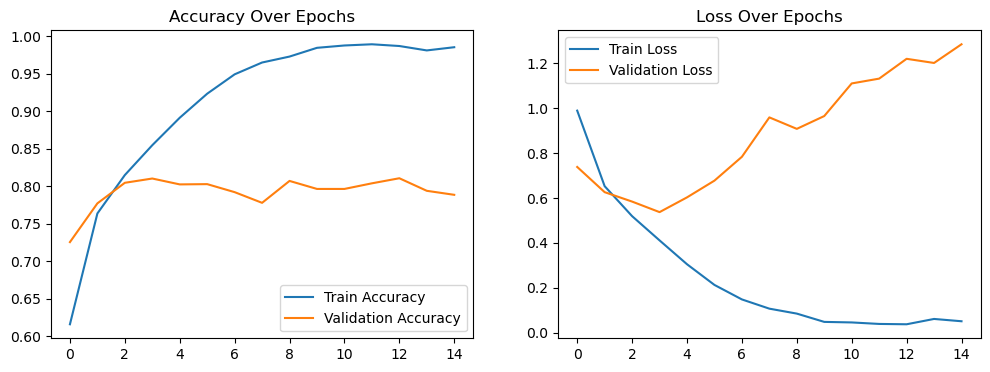

88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8169 - loss: 1.2155

Best model validation accuracy: 81.05%


In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

def load_and_preprocess_data():
    # Load and reshape the preprocessed data
    print("Loading preprocessed data...")
    X = np.load("X.npy")  # Load flattened images (N, 67500)
    y = np.load("y.npy")  # Load labels (N,)

    # Reshape to 3D (CNN needs height×width×channels)
    X = X.reshape(-1, 150, 150, 3)  # Shape: (num_images, 150, 150, 3)
    print(f"Reshaped data: {X.shape}")

    # Split into train/validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val

def build_cnn_model():
    # Construct the CNN architecture
    model = Sequential(name="IntelImageCNN")

    # Conv block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))

    # Conv block 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Conv block 3
    model.add(Conv2D(128, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(6, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

def plot_results(history):
    # Visualize training progress
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    plt.savefig('training_history.png')
    plt.show()

def main():
    # 1. Load and prepare data (reshaping, splitting)
    X_train, X_val, y_train, y_val = load_and_preprocess_data()

    # 2. Build model
    model = build_cnn_model()
    model.summary()

    # 3. Train with checkpointing (saves the best version of the model automatically during training)
    checkpoint = ModelCheckpoint("best_model.keras", # best model is saved in "best_model.keras"
                               save_best_only=True,
                               monitor='val_accuracy')

    print("Training CNN...")
    history = model.fit(X_train, y_train,
                       epochs=15,
                       batch_size=32,
                       validation_data=(X_val, y_val),
                       callbacks=[checkpoint])

    # 4. Evaluate and visualize
    plot_results(history)

    # Load best model
    from tensorflow.keras.models import load_model
    best_model = load_model("best_model.keras")
    val_loss, val_acc = best_model.evaluate(X_val, y_val)
    print(f"\nBest model validation accuracy: {val_acc:.2%}")

if __name__ == "__main__":
    main()